In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from activ import load_data
import pandas as pd
from activ.analytics import outcomes_histogram
from matplotlib.backends.backend_pdf import PdfPages

In [27]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata.shape

(586, 919)

In [29]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [30]:
sub6mo =[]
for ii,c in enumerate(sub_oc_features):
    if 'PCL' in c:
        print(ii,c)
        sub6mo.append(ii)

119 PCLImages_6mo
120 PCLDreams_6mo
121 PCLFeeling_6mo
122 PCLVeryUpset_6mo
123 PCLPhysicalReactions_6mo
124 PCLThinking_6mo
125 PCLActivities_6mo
126 PCLRemembering_6mo
127 PCLLossOfInterest_6mo
128 PCLDistant_6mo
129 PCLEmotionallyNumb_6mo
130 PCLFuture_6mo
131 PCLAsleep_6mo
132 PCLIrritable_6mo
133 PCLConcentrating_6mo
134 PCLSuperAlert_6mo
135 PCLJumpy_6mo
140 PCLTotalScore_6mo


In [31]:
full6mo = [512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,533]
full12mo = [649,650,651,652,653,655,656,657,658,659,660,661,663,664,665,666,667,670]
for ii,o in enumerate(fulldata.columns):
    if 'PCL' in o:
        print(ii,o)

512 PCLImages_6mo
513 PCLDreams_6mo
514 PCLFeeling_6mo
515 PCLVeryUpset_6mo
516 PCLPhysicalReactions_6mo
517 PCLThinking_6mo
518 PCLActivities_6mo
519 PCLRemembering_6mo
520 PCLLossOfInterest_6mo
521 PCLDistant_6mo
522 PCLEmotionallyNumb_6mo
523 PCLFuture_6mo
524 PCLAsleep_6mo
525 PCLIrritable_6mo
526 PCLConcentrating_6mo
527 PCLSuperAlert_6mo
528 PCLJumpy_6mo
533 PCLTotalScore_6mo
649 PCLImages_12mo
650 PCLDreams_12mo
651 PCLFeeling_12mo
652 PCLVeryUpset_12mo
653 PCLPhysicalReactions_12mo
655 PCLThinking_12mo
656 PCLActivities_12mo
657 PCLRemembering_12mo
658 PCLLossOfInterest_12mo
659 PCLDistant_12mo
660 PCLEmotionallyNumb_12mo
661 PCLFuture_12mo
663 PCLAsleep_12mo
664 PCLIrritable_12mo
665 PCLConcentrating_12mo
666 PCLSuperAlert_12mo
667 PCLJumpy_12mo
670 PCLTotalScore_12mo


5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
83.0


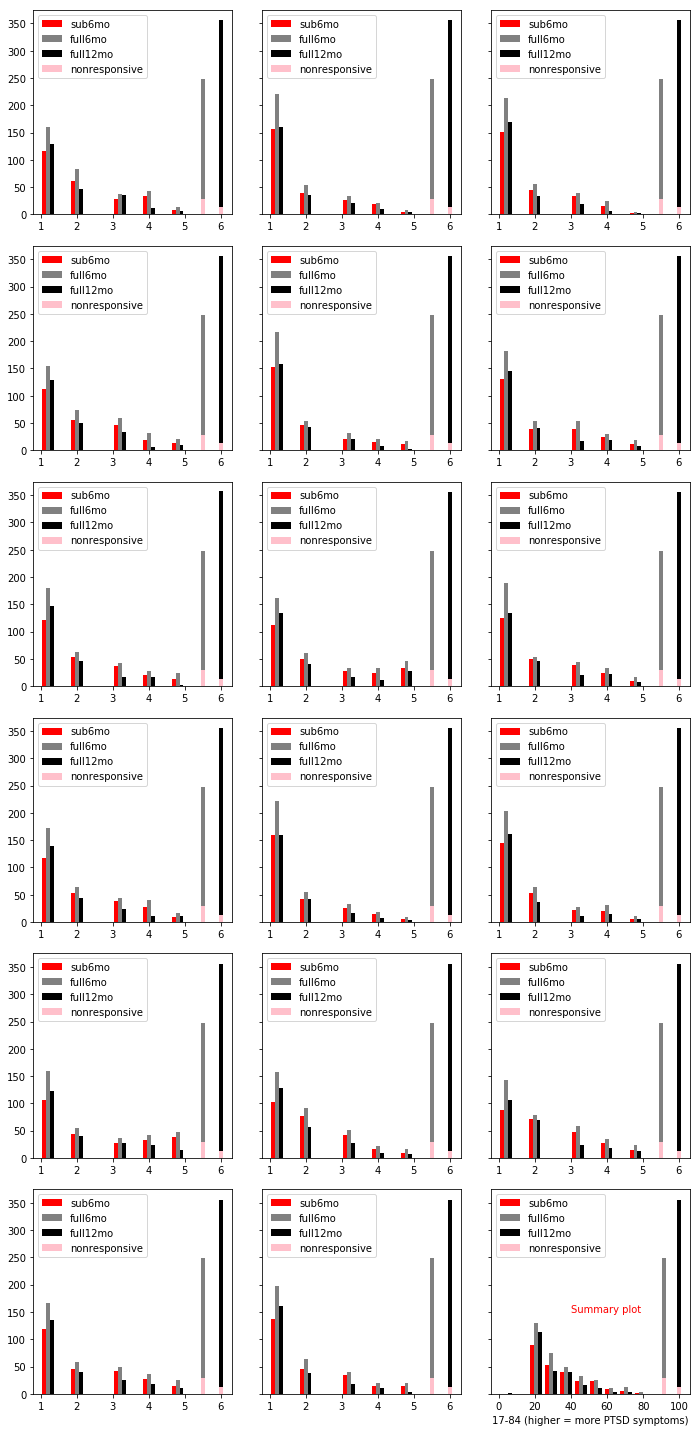

In [32]:
fig, ax = plt.subplots(6,3,sharey=True,figsize=(10,20))
ax = ax.flatten()
count = 0
names = ['PCLImages','PCLDreams','PCLFeeling', 'PCLVeryUpset', 'PCLPhysicalReactions',
        'PCLThinking','PCLActivities','PCLRemembering','PCLLossOfInterest', 'PCLDistant',
        'PCLEmotionallyNumb','PCLFuture','PCLAsleep','PCLIrritable','PCLConcentrating',
        'PCLSuperAlert','PCLJumpy','PCLTotalScore']
for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    full12 = fulldata.iloc[:,z]
    
    dat = full6
    dat2 = full12
    
    num_na = dat.isna().sum()
    num_na2 = dat2.isna().sum()
    nonresponsive = 29
    nonresponsive2 = 13

    dat_dropna = dat.dropna()
    dat2_dropna = dat2.dropna()
    counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'])
    length = (bins[1]-bins[0])/4
    
    mx = max(max(dat_dropna),max(dat2_dropna))
    print(mx)
    na_index = mx*(1+1/10) 
    na_index2 = mx*(1+2/10)
        
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
    ax[count].bar(na_index2, nonresponsive2, color='pink', width=length)
    ax[count].bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
    ax[count].legend()
    count += 1
    
ax[17].set_xlabel('17-84 (higher = more PTSD symptoms)')
ax[17].text(40,150,'Summary plot', color='red')
fig.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/pcl_hist.pdf')

0      -5.0
1      -5.0
2      30.0
3      -5.0
4      -5.0
5      27.0
6      -5.0
7      -5.0
8      -5.0
9      -5.0
10     25.0
11     -5.0
12     29.0
13     24.0
14     -5.0
15     -5.0
16     -5.0
17     -5.0
18     -5.0
19     -5.0
20     44.0
21     30.0
22     -5.0
23     -5.0
24     -5.0
25     49.0
26     -5.0
27     21.0
28     38.0
29     -5.0
       ... 
556    68.0
557    -5.0
558    27.0
559    23.0
560    21.0
561    -5.0
562    25.0
563    -5.0
564    25.0
565    62.0
566    27.0
567    -5.0
568    41.0
569    69.0
570    -5.0
571    56.0
572    54.0
573    -5.0
574    25.0
575    -5.0
576    83.0
577    -5.0
578    -5.0
579    20.0
580    -5.0
581    48.0
582    40.0
583    -5.0
584    22.0
585    -5.0
Name: PCLTotalScore_6mo, Length: 586, dtype: float64


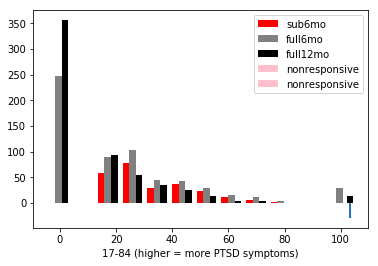

In [26]:
sub6mo = sub_oc[:,140]
full6mo = fulldata.iloc[:,533]
full12mo = fulldata.iloc[:,670]

dat = full6mo
dat2 = full12mo

num_na = dat.isna().sum()
num_na2 = dat2.isna().sum()
nonresponsive = 29
nonresponsive2 = 13

dat_dropna = dat.dropna()
dat2_dropna = dat2.dropna()

print(dat_dropna)

na_index = max(dat_dropna)+max(dat_dropna)*(1/5) 
na_index2 = max(dat2_dropna)+max(dat_dropna)*(2/5)

plt.hist([sub6mo, dat_dropna, dat2_dropna], color=['red', 'gray', 'black'], label=['sub6mo', 'full6mo', 'full12mo'])
plt.xlabel('17-84 (higher = more PTSD symptoms)')
plt.bar(na_index, nonresponsive, color='pink', label='nonresponsive')
plt.bar(na_index, num_na-nonresponsive, color='grey', bottom=nonresponsive)
plt.bar(na_index, nonresponsive2, color='pink')
plt.bar(na_index2, num_na2-nonresponsive)

plt.bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
plt.bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
plt.bar(na_index2, nonresponsive2, color='pink', width=length)
plt.bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
plt.legend()